# 트위터 시계열 그래프

In [ ]:
import pandas as pd
import datetime as dt
from datetime import timedelta, date
from datetime import datetime
from dateutil import relativedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

In [ ]:
!pip install konlpy
from konlpy.tag import Komoran
komoran = Komoran(userdic='./data/단어 추가.txt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 코랩 환경일 경우 실행
'''
from google.colab import drive
drive.mount('/content/drive')
'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 규민 언급 트윗

### 날짜별로

In [ ]:
# 워드클라우드 만들 때 만들었던 합본 파일 불러옴
tweet = pd.read_csv('./data/twitter/트위터_환승연애,환연 합본.csv')
tweet

,Unnamed: 0,date,tweet
0,0,2022-07-15 ~ 2022-07-16,환승연애2 x커플 모르겠고 이현나연 케미뢰전드.. \n심지어 저웅니들 둘이 룸메임
1,1,2022-07-15 ~ 2022-07-16,환승연애 최이현 여친짤 재질 미쳤음.. 아름다우셔
2,2,2022-07-15 ~ 2022-07-16,환승연애 첫선택 #menow
3,3,2022-07-15 ~ 2022-07-16,환승연애2 최이현 조승우 썰ㅋㅋ
4,4,2022-07-15 ~ 2022-07-16,환승연애2\n\n해가될까 \n\n#조승연 #WOODZ
...,...,...,...
9973,9973,2022-11-10 ~ 2022-11-11,환연 안봤어도 끼워주시나요
9974,9974,2022-11-10 ~ 2022-11-11,뭐야 왜 우리 만나서 환연 토론 안했어
9975,9975,2022-11-10 ~ 2022-11-11,환연이 인기있는 이유져 남의 연애가 완전 잼나다 근데 전 리얼리티연애 프로그램 보...
9976,9976,2022-11-10 ~ 2022-11-11,환연나가자는거아님????


In [ ]:
# 결측값 NaN으로 채우기
tweet.fillna('NaN', inplace=True)

# tweet에서 한글만 뽑아 tweet_clean에 저장
import re
def text_cleaning(text):
  hangul = re.compile('[^ ㄱㅣ가-힣]+')
  result=hangul.sub('',text)
  return result

tweet['tweet_clean']=tweet['tweet'].apply(lambda x:text_cleaning(x))

# 댓글 내용 명사 형태소만 출력하여 '명사'에 저장
tweet['명사'] = tweet['tweet_clean'].apply(komoran.nouns)

# date에서 시작일만 뽑아서 start date에 저장
tweet['start_date'] = tweet['date'].map(lambda x: x[:10])

In [ ]:
# '규민'을 포함하는 트윗은 1, 포함하지 않으면 1로 만들기
#tweet['규민 언급 트윗']=0
#for i in range(len(tweet)):
#  if '규민' in tweet['tweet_clean'][i]:
#    tweet['규민 언급 트윗'][i] = 1
#  else :
#    tweet['규민 언급 트윗'][i] = 0

# date에서 시작일만 뽑아서 start date에 저장
#tweet['start_date'] = tweet['date'].map(lambda x: x[:10])

# 시작일별로 규민 트윗 합계
#df_gyumin_date = tweet.groupby(['start_date'])['규민 언급 트윗'].sum()

# 데이터프레임으로
#df_gyumin_date = pd.DataFrame(df_gyumin_date)

In [ ]:
# '규민'을 포함하는 트윗은 1, 포함하지 않으면 1로 만들기
tweet['규민 언급 트윗']=0
for i in range(len(tweet)):
  if '규민' in tweet['tweet_clean'][i]:
    tweet['규민 언급 트윗'][i] = 1
  else :
    tweet['규민 언급 트윗'][i] = 0

# 시작일별로 규민 트윗 합계
df_gyumin_date = tweet.groupby(['start_date'])['규민 언급 트윗'].sum()

# 데이터프레임으로
df_gyumin_date = pd.DataFrame(df_gyumin_date)

<ipython-input-23-c9aea08d7637>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['규민 언급 트윗'][i] = 0
<ipython-input-23-c9aea08d7637>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['규민 언급 트윗'][i] = 1


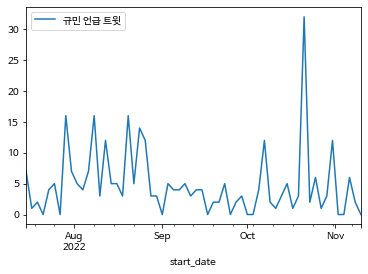

<Figure size 1080x1440 with 0 Axes>

In [ ]:
#규민 트윗 날짜별로 시계열 그래프 그리기
df_gyumin_date.plot()
plt.figure(figsize=(15, 20))
plt.show()

### 회차별로

In [ ]:
# 7/15부터 11/11까지 일주일 간격으로 period 생성
start_date = pd.to_datetime('2022-07-15')
end_date = pd.to_datetime('2022-11-04')
p_rng = pd.period_range(start_date, end_date, freq = '7d')
start_dates = p_rng.asfreq(freq='B', how='start')
end_dates = p_rng.asfreq(freq='B', how='end')

# string 타입은 start_str, end_str에
start_str = [d.strftime('%Y-%m-%d') for d in start_dates]
end_str = [d.strftime('%Y-%m-%d') for d in end_dates]

# datetime 타입은 start_time, end_time에
start_time=[]
end_time = []
for i in range(len(start_str)):
  start_time.append(datetime.strptime(start_str[i], '%Y-%m-%d'))
for i in range(len(end_str)):
  end_time.append(datetime.strptime(end_str[i], '%Y-%m-%d'))

# 'start_date'에 있는 날짜 datetime 형식으로 변환
tweet['start_date'] = pd.to_datetime(tweet['start_date'])

# 회차별로 리스트를 만들어 start_date의 날짜가 포함되면 '회차' 열에 나타나도록
tweet['회차'] = 0 
d = dt.timedelta(days=1)
for i in range(len(tweet)):
  for j in range(len(start_time)):
    date_list = np.arange(start_time[j], end_time[j]+d, dtype='datetime64[D]')
    date_list = date_list.tolist()
    if tweet['start_date'][i] in date_list:
      tweet['회차'][i] = j+1

tweet

<ipython-input-9-f8fc93558bd5>:30: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if tweet['start_date'][i] in date_list:
<ipython-input-9-f8fc93558bd5>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['회차'][i] = j+1


,Unnamed: 0,date,tweet,tweet_clean,명사,규민 언급 트윗,start_date,회차
0,0,2022-07-15 ~ 2022-07-16,환승연애2 x커플 모르겠고 이현나연 케미뢰전드.. \n심지어 저웅니들 둘이 룸메임,환승연애 커플 모르겠고 이현나연 케미뢰전드 심지어 저웅니들 둘이 룸메임,"[환승연애, 커플, 이현, 나연, 룸, 메]",0,2022-07-15,1
1,1,2022-07-15 ~ 2022-07-16,환승연애 최이현 여친짤 재질 미쳤음.. 아름다우셔,환승연애 최이현 여친짤 재질 미쳤음 아름다우셔,"[환승연애, 최, 이현, 여치, 재질, 아름, 다우]",0,2022-07-15,1
2,2,2022-07-15 ~ 2022-07-16,환승연애 첫선택 #menow,환승연애 첫선택,"[환승연애, 선택]",0,2022-07-15,1
3,3,2022-07-15 ~ 2022-07-16,환승연애2 최이현 조승우 썰ㅋㅋ,환승연애 최이현 조승우 썰,"[환승연애, 최, 이현, 조승우]",0,2022-07-15,1
4,4,2022-07-15 ~ 2022-07-16,환승연애2\n\n해가될까 \n\n#조승연 #WOODZ,환승연애해가될까 조승연,"[환승연애, 조승연]",0,2022-07-15,1
...,...,...,...,...,...,...,...,...
9973,9973,2022-11-10 ~ 2022-11-11,환연 안봤어도 끼워주시나요,환연 안봤어도 끼워주시나요,[환연],0,2022-11-10,17
9974,9974,2022-11-10 ~ 2022-11-11,뭐야 왜 우리 만나서 환연 토론 안했어,뭐야 왜 우리 만나서 환연 토론 안했어,"[환연, 토론, 안]",0,2022-11-10,17
9975,9975,2022-11-10 ~ 2022-11-11,환연이 인기있는 이유져 남의 연애가 완전 잼나다 근데 전 리얼리티연애 프로그램 보...,환연이 인기있는 이유져 남의 연애가 완전 잼나다 근데 전 리얼리티연애 프로그램 보...,"[환연, 인기, 이유, 남, 연애, 완전, 리얼리티, 연애, 프로그램, 건, 별, ...",0,2022-11-10,17
9976,9976,2022-11-10 ~ 2022-11-11,환연나가자는거아님????,환연나가자는거아님,"[환연, 거]",0,2022-11-10,17


In [ ]:
#tweet.to_csv('트위터 회차 정보 포함.csv')

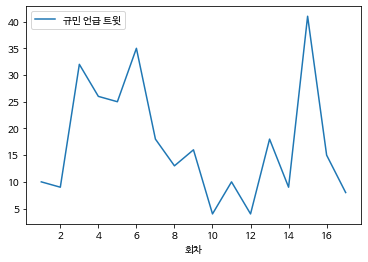

In [ ]:
# 회차별로 규민 트윗 합계
df_gyumin_ep = tweet.groupby(['회차'])['규민 언급 트윗'].sum()

# 데이터프레임으로
df_gyumin_ep = pd.DataFrame(df_gyumin_ep)

#규민 트윗 회차별 시계열 그래프 그리기
plt.rc('font', family='NanumBarunGothic') 
df_gyumin_ep.plot()
plt.show()

## 해은 언급 트윗

### 날짜별로

In [ ]:
# '해은'을 포함하는 트윗은 1, 포함하지 않으면 1로 만들기
tweet['해은 언급 트윗']=0
for i in range(len(tweet)):
  if '해은' in tweet['tweet_clean'][i]:
    tweet['해은 언급 트윗'][i] = 1
  else :
    tweet['해은 언급 트윗'][i] = 0

# 시작일별로 해은 트윗 합계
df_haeeun_date = tweet.groupby(['start_date'])['해은 언급 트윗'].sum()

# 데이터프레임으로
df_haeeun_date = pd.DataFrame(df_haeeun_date)

<ipython-input-12-bdd46a8a5501>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['해은 언급 트윗'][i] = 0
<ipython-input-12-bdd46a8a5501>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['해은 언급 트윗'][i] = 1


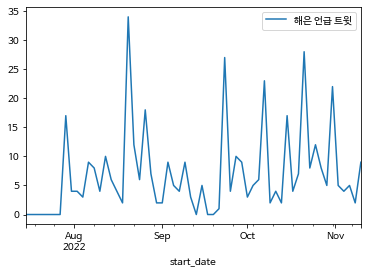

<Figure size 1080x1440 with 0 Axes>

In [ ]:
#해은 트윗 날짜별로 시계열 그래프 그리기
df_haeeun_date.plot()
plt.figure(figsize=(15, 20))
plt.show()

### 회차별로

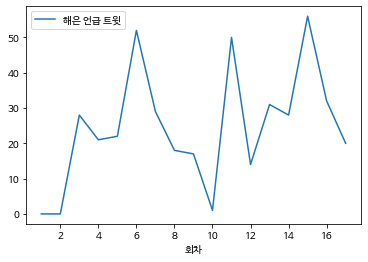

In [ ]:
# 회차별로 해은 트윗 합계
df_haeeun_ep = tweet.groupby(['회차'])['해은 언급 트윗'].sum()

# 데이터프레임으로
df_haeeun_ep = pd.DataFrame(df_haeeun_ep)

#해은 트윗 회차별 시계열 그래프 그리기
plt.rc('font', family='NanumBarunGothic') 
df_haeeun_ep.plot()
plt.show()

## 프로그램 포맷 관련 언급 (엑스, X)

### 날짜별로

In [ ]:
# '엑스'을 포함하는 트윗은 1, 포함하지 않으면 1로 만들기
tweet['엑스 언급 트윗']=0
for i in range(len(tweet)):
  if '엑스' in tweet['tweet_clean'][i] or 'X' in tweet['tweet_clean'][i] or 'x' in tweet['tweet_clean'][i]:
    tweet['엑스 언급 트윗'][i] = 1
  else :
    tweet['엑스 언급 트윗'][i] = 0

# 시작일별로 엑스 트윗 합계
df_format_date = tweet.groupby(['start_date'])['엑스 언급 트윗'].sum()

# 데이터프레임으로
df_format_date = pd.DataFrame(df_format_date)

<ipython-input-15-de9f0f95a4db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['엑스 언급 트윗'][i] = 0
<ipython-input-15-de9f0f95a4db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['엑스 언급 트윗'][i] = 1


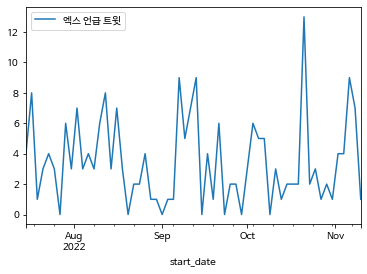

<Figure size 1080x1440 with 0 Axes>

In [ ]:
# 엑스 언급 트윗 날짜별로 시계열 그래프 그리기
df_format_date.plot()
plt.figure(figsize=(15, 20))
plt.show()

### 회차별로

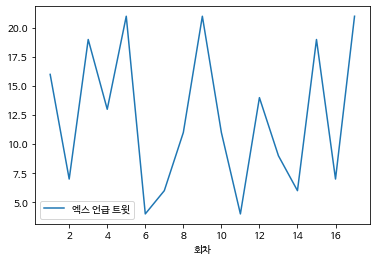

In [ ]:
# 회차별로 엑스 트윗 합계
df_format_ep = tweet.groupby(['회차'])['엑스 언급 트윗'].sum()

# 데이터프레임으로
df_format_ep = pd.DataFrame(df_format_ep)

#엑스 트윗 회차별 시계열 그래프 그리기
plt.rc('font', family='NanumBarunGothic') 
df_format_ep.plot()
plt.show()

## 나연 언급 트윗

### 날짜별로

In [ ]:
# '나연'을 포함하는 트윗은 1, 포함하지 않으면 1로 만들기
tweet['나연 언급 트윗']=0
for i in range(len(tweet)):
  if '나연' in tweet['tweet_clean'][i] or 'X' in tweet['tweet_clean'][i] or 'x' in tweet['tweet_clean'][i]:
    tweet['나연 언급 트윗'][i] = 1
  else :
    tweet['나연 언급 트윗'][i] = 0

# 시작일별로 나연 트윗 합계
df_nayeon_date = tweet.groupby(['start_date'])['나연 언급 트윗'].sum()

# 데이터프레임으로
df_nayeon_date = pd.DataFrame(df_nayeon_date)

<ipython-input-26-6db685b136af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['나연 언급 트윗'][i] = 1
<ipython-input-26-6db685b136af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['나연 언급 트윗'][i] = 0


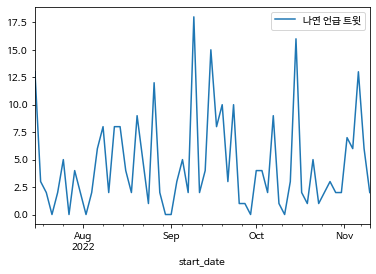

<Figure size 1080x1440 with 0 Axes>

In [ ]:
# 나연 언급 트윗 날짜별로 시계열 그래프 그리기
df_nayeon_date.plot()
plt.figure(figsize=(15, 20))
plt.show()

### 회차별로

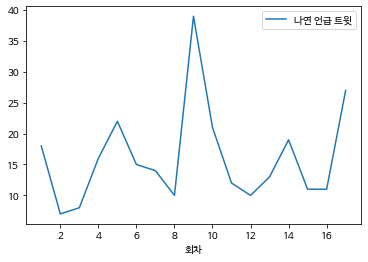

In [ ]:
# 회차별로 나연 트윗 합계
df_nayeon_ep = tweet.groupby(['회차'])['나연 언급 트윗'].sum()

# 데이터프레임으로
df_nayeon_ep = pd.DataFrame(df_nayeon_ep)

#나연 트윗 회차별 시계열 그래프 그리기
plt.rc('font', family='NanumBarunGothic') 
df_nayeon_ep.plot()
plt.show()

## 현규 언급 트윗

### 날짜별로

In [ ]:
# '현규'을 포함하는 트윗은 1, 포함하지 않으면 1로 만들기
tweet['현규 언급 트윗']=0
for i in range(len(tweet)):
  if '현규' in tweet['tweet_clean'][i] or 'X' in tweet['tweet_clean'][i] or 'x' in tweet['tweet_clean'][i]:
    tweet['현규 언급 트윗'][i] = 1
  else :
    tweet['현규 언급 트윗'][i] = 0

# 시작일별로 현규 트윗 합계
df_hyungyu_date = tweet.groupby(['start_date'])['현규 언급 트윗'].sum()

# 데이터프레임으로
df_hyungyu_date = pd.DataFrame(df_hyungyu_date)

<ipython-input-29-64188b9c21e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['현규 언급 트윗'][i] = 0
<ipython-input-29-64188b9c21e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['현규 언급 트윗'][i] = 1


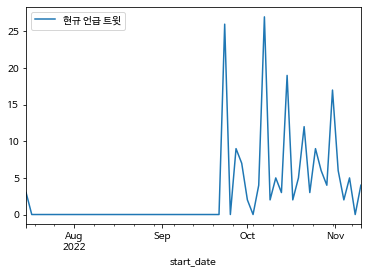

<Figure size 1080x1440 with 0 Axes>

In [ ]:
# 현규 언급 트윗 날짜별로 시계열 그래프 그리기
df_hyungyu_date.plot()
plt.figure(figsize=(15, 20))
plt.show()

### 회차별로

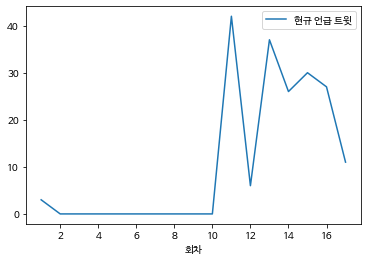

In [ ]:
# 회차별로 현규 트윗 합계
df_hyungyu_ep = tweet.groupby(['회차'])['현규 언급 트윗'].sum()

# 데이터프레임으로
df_hyungyu_ep = pd.DataFrame(df_hyungyu_ep)

#현규 트윗 회차별 시계열 그래프 그리기
plt.rc('font', family='NanumBarunGothic') 
df_hyungyu_ep.plot()
plt.show()

## 통합 시계열 그래프

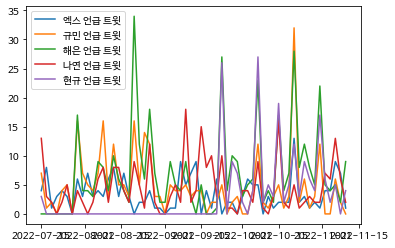

In [ ]:
# 날짜별 통합
plt.plot(df_format_date, label='엑스 언급 트윗')
plt.plot(df_gyumin_date, label = '규민 언급 트윗')
plt.plot(df_haeeun_date, label = '해은 언급 트윗')
plt.plot(df_nayeon_date, label = '나연 언급 트윗')
plt.plot(df_hyungyu_date, label = '현규 언급 트윗')
plt.legend()

plt.show()

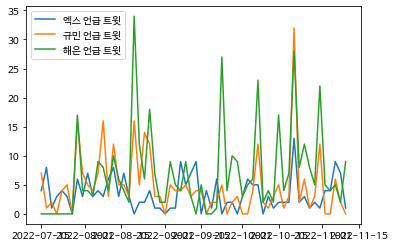

In [ ]:
# 날짜별 통합 (너무 복잡해서 엑스, 규민, 해은만)
plt.plot(df_format_date, label='엑스 언급 트윗')
plt.plot(df_gyumin_date, label = '규민 언급 트윗')
plt.plot(df_haeeun_date, label = '해은 언급 트윗')
#plt.plot(df_nayeon_date, label = '나연 언급 트윗')
#plt.plot(df_hyungyu_date, label = '현규 언급 트윗')
plt.legend()

plt.show()

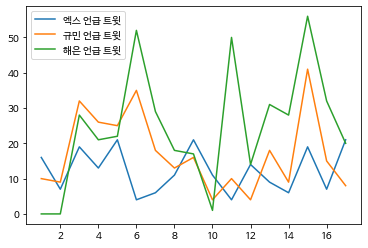

In [ ]:
# 회차별 통합
plt.plot(df_format_ep, label='엑스 언급 트윗')
plt.plot(df_gyumin_ep, label = '규민 언급 트윗')
plt.plot(df_haeeun_ep, label = '해은 언급 트윗')
plt.legend()

plt.show()

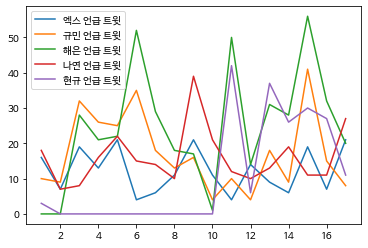

In [ ]:
# 회차별 통합
plt.plot(df_format_ep, label='엑스 언급 트윗')
plt.plot(df_gyumin_ep, label = '규민 언급 트윗')
plt.plot(df_haeeun_ep, label = '해은 언급 트윗')
plt.plot(df_nayeon_ep, label = '나연 언급 트윗')
plt.plot(df_hyungyu_ep, label = '현규 언급 트윗')
plt.legend()

plt.show()